In [25]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

np.set_printoptions(linewidth=150)
pd.set_option('display.max_columns', 500)

In [26]:
df = pd.read_pickle('pair_losses.pkl')

,_matrix_id,_score_macro,_score_micro,macro_cell_matrices,macro_cell_types,macro_curve,macro_data,macro_drop_path,macro_early_terminate,macro_epoch,macro_epochs,macro_log,macro_lr,macro_lr_schedule,macro_max,macro_momentum,macro_params,macro_per_epoch_time,macro_predictions,macro_prefix,macro_residual_cells,macro_run_date,macro_scale,macro_scales,macro_time_taken,macro_track_progess,macro_track_progress,macro_verbose,macro_weight_decay,micro_cell_matrices,micro_cell_types,micro_curve,micro_data,micro_drop_path,micro_early_terminate,micro_epoch,micro_epochs,micro_log,micro_lr,micro_lr_schedule,micro_max,micro_momentum,micro_params,micro_per_epoch_time,micro_predictions,micro_prefix,micro_residual_cells,micro_run_date,micro_scale,micro_scales,micro_time_taken,micro_track_progess,micro_track_progress,micro_verbose,micro_weight_decay,micro_reductions,macro_reductions,micro_cells,macro_cells,macro_cell_parallel
0,1,9096,5740,"[[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [...","[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1]","[1008, 1662, 2794, 3015, 3565, 3811, 4380, 465...",NaN,True,False,512,512.0,True,NaN,"{'type': 'cosine', 'lr_min': 0, 'lr_max': 0.00...",9096.0,0.9,15816838.0,"1 min, 24 s",[],NaN,False,2018-11-15 02:30:05,3.0,"(2.0, 0.5)","12 hrs, 39 mins, 35 s",NaN,NaN,True,0.0001,"[[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [...","[1, 1]","[4336, 4489, 4328, 5743, 5818, 5740]",NaN,True,True,6,10.0,True,0.01,"{'type': 'cosine', 'lr_min': 0, 'lr_max': 0.01...",5818.0,0.9,23539.0,None,[],NaN,NaN,2018-11-01 15:01:31,1.0,"[(2.0, 0.5), (2.0, 0.5)]","4 min, 14 s",NaN,NaN,True,0.0001,2,5,2,13,1
1,1,8886,5740,"[[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [...","[1, 0, 1, 0, 1, 0, 1, 0, 1]","[1065, 4079, 5030, 5537, 5732, 5880, 6162, 644...",NaN,True,False,512,512.0,True,NaN,"{'type': 'cosine', 'lr_min': 0, 'lr_max': 0.00...",8886.0,0.9,26385610.0,"2 min, 12 s",[],NaN,False,2018-11-16 10:33:07,3.0,"(2.0, 0.5)","19 hrs, 49 mins, 50 s",NaN,NaN,True,0.0001,"[[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [...","[1, 1]","[4336, 4489, 4328, 5743, 5818, 5740]",NaN,True,True,6,10.0,True,0.01,"{'type': 'cosine', 'lr_min': 0, 'lr_max': 0.01...",5818.0,0.9,23539.0,None,[],NaN,NaN,2018-11-01 15:01:31,1.0,"[(2.0, 0.5), (2.0, 0.5)]","4 min, 14 s",NaN,NaN,True,0.0001,2,5,2,9,2
2,1,8867,5740,"[[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [...","[1, 0, 1, 0, 1, 0, 1, 0, 1]","[854, 3979, 4933, 5318, 5248, 5777, 6158, 6311...",NaN,True,False,512,512.0,True,NaN,"{'type': 'cosine', 'lr_min': 0, 'lr_max': 0.00...",8867.0,0.9,13244098.0,"1 min, 7 s",[],NaN,False,2018-11-20 07:56:03,3.0,"(2.0, 0.5)","10 hrs, 6 mins, 58 s",NaN,NaN,True,0.0001,"[[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [...","[1, 1]","[4336, 4489, 4328, 5743, 5818, 5740]",NaN,True,True,6,10.0,True,0.01,"{'type': 'cosine', 'lr_min': 0, 'lr_max': 0.01...",5818.0,0.9,23539.0,None,[],NaN,NaN,2018-11-01 15:01:31,1.0,"[(2.0, 0.5), (2.0, 0.5)]","4 min, 14 s",NaN,NaN,True,0.0001,2,5,2,9,1
3,1,8551,5740,"[[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [...","[1, 0, 1, 0, 1, 0, 1, 0, 1]","[953, 4165, 4769, 5170, 5274, 5571, 5704, 5870...",NaN,True,False,512,512.0,True,NaN,"{'type': 'cosine', 'lr_min': 0, 'lr_max': 0.00...",8551.0,0.9,14700034.0,"1 min, 28 s",[],NaN,False,2018-11-21 00:26:34,3.0,"(2.0, 0.5)","13 hrs, 17 mins, 7 s",NaN,NaN,True,0.0001,"[[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [...","[1, 1]","[4336, 4489, 4328, 5743, 5818, 5740]",NaN,True,True,6,10.0,True,0.01,"{'type': 'cosine', 'lr_min': 0, 'lr_max': 0.01...",5818.0,0.9,23539.0,None,[],NaN,NaN,2018-11-01 15:01:31,1.0,"[(2.0, 0.5), (2.0, 0.5)]","4 min, 14 s",NaN,NaN,True,0.0001,2,5,2,9,2
4,1,9096,4929,"[[[0, 9, 9, 15, 2, 0], [0, 0, 14, 0, 13, 5], [...","[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1]","[1008, 1662, 2794, 3015, 3565, 3811, 4380, 465...",NaN,True,False,512,512.0,True,NaN,"{'type': 'cosine', 'lr_min': 0, 'lr_max': 0.00...",9096.0,0.9,15816838.0,"1 min, 24 s",[],NaN,False,2018-11-15 02:30:05,3.0,"(2.0, 0.5)","12 hrs, 39 mins, 35 s",NaN,Na

Intercept: 7483916.495963177
Coefficients: 
 micro_params: 179.2750 macro_reductions: -0.0000 macro_scale: -6354099.7175 macro_cell_parallel: 5030223.4659 macro_cells: 1109417.8545


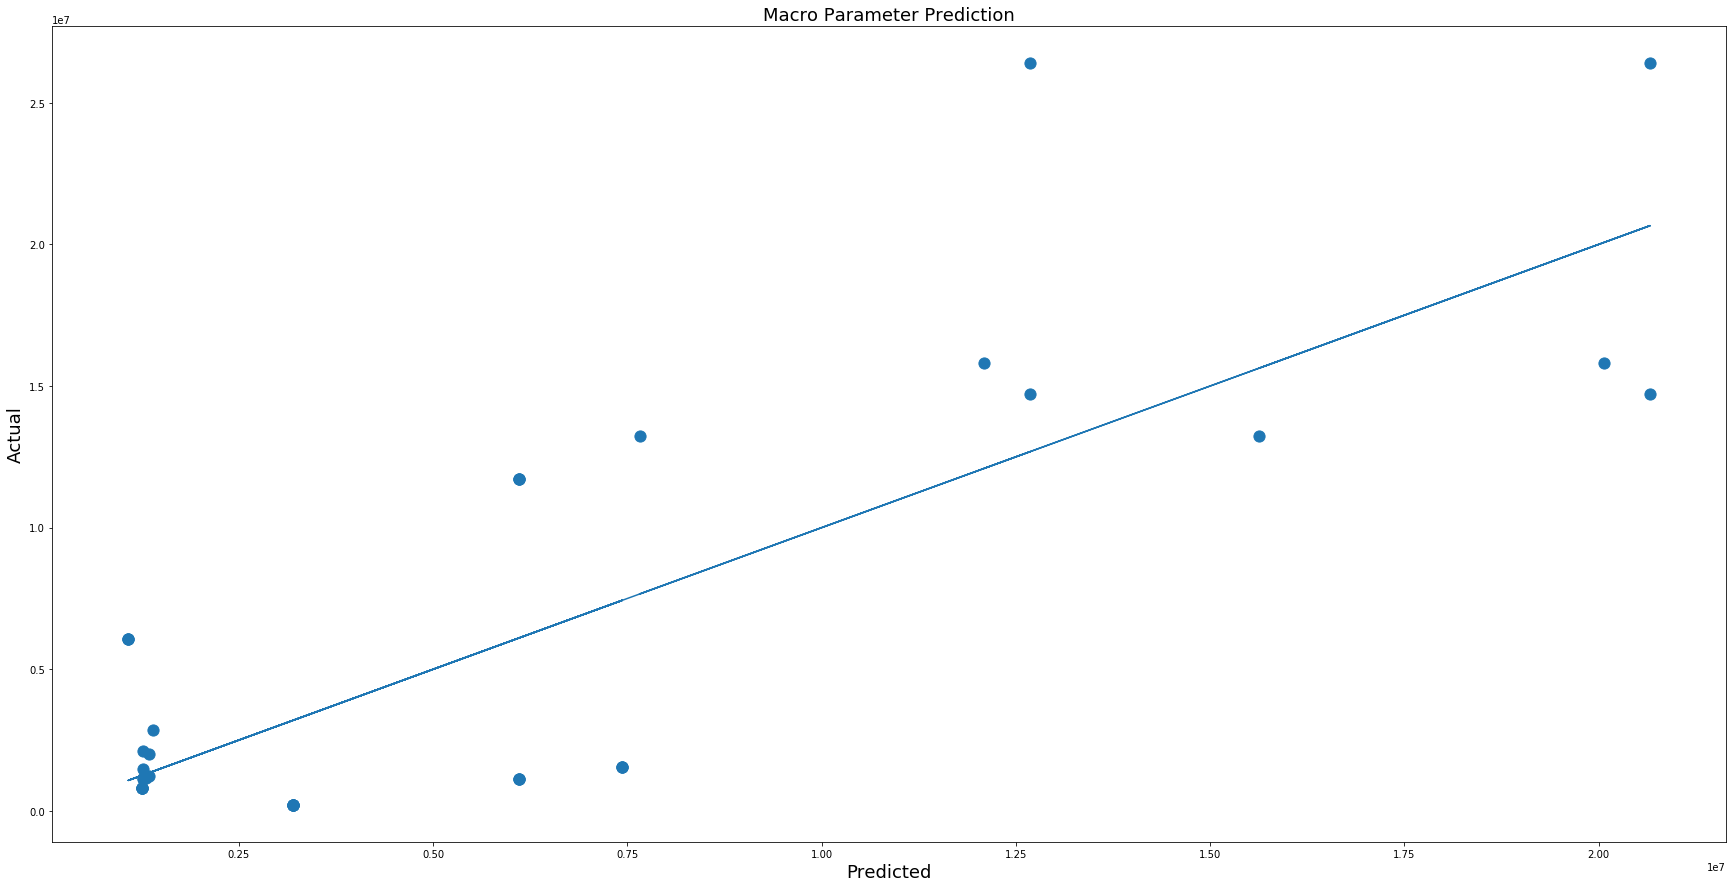

In [27]:
X = df[['micro_params','macro_reductions','macro_scale','macro_cell_parallel','macro_cells']]
Y = df['macro_params']

regr = linear_model.LinearRegression()
regr.fit(X,Y)
print('Intercept:', regr.intercept_)
print('Coefficients: \n', *["{}: {:.4f}".format(list(X)[i],x) for (i,x) in enumerate(regr.coef_)])
x_func = regr.intercept_+np.dot(X,regr.coef_)

plt.figure(figsize=(30,15))
plt.scatter(x_func,Y,marker=".",s=500)
plt.plot(x_func,x_func)
plt.title("Macro Parameter Prediction",fontsize=18)
plt.xlabel("Predicted",fontsize=18)
plt.ylabel("Actual",fontsize=18)
plt.show()